# **TRAFFIC COLLISION PREDICTION - COLLISION**

**DATA PREPROCESSING**

In [13]:
import pandas as pd

#Missing Value in data
df = pd.read_excel(r"C:\Users\farhe\Documents\Learning\Ryerson\Certificate\CIND820\Raw\Data_frame.xlsx", na_values = "Missing",sheet_name='Sheet1')
print(df.head())

In [151]:
#Check for data type for each attribute
#df.dtypes

#Check min for each attribute
#df.min()

#Check max for each attribute
#df.max()

#Calculate mean for each attribute
#df.mean()

#Calculate standard deviation for each attribute
#df.std()

#Check distinct value for each attribtute
#df.iloc[:,:11].nunique()

#Check missing value for each attribtute
#df.isnull().sum()

#Treat Time in Hours (to identify peak hours of collision) & Days (to identify peak days of collision)
#df['hour'] = df.START_DT.dt.hour
#df['hour'].describe()
#df['day'] = df.START_DT.dt.day
#df['day'].describe()
#df['month'] = df.START_DT.dt.day
df['month'].describe()

#df.iloc[:,1]
#df.iloc[:,1].value_counts()

count    27894.000000
mean         6.648885
std          3.559166
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

**Box Plots**

In [ ]:
#Identify outliers for numerical columns
df.boxplot(column=['Longitude', 'Latitude', 'Count'])

**Histogram**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Longitude
n, bins, patches = plt.hist(x=df.iloc[:,5], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('NAME')
plt.ylabel('Frequency')
plt.title('Longitude')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


TypeError: 'value' must be an instance of str or bytes, not a pandas._libs.tslibs.timestamps.Timestamp

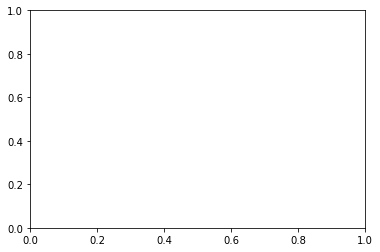

In [81]:
#START_DT
n, bins, patches = plt.hist(x=df.iloc[3], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('NAME')
plt.ylabel('Frequency')
plt.title('TIME')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
#Latitude
n, bins, patches = plt.hist(x=df.iloc[:,3], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('YEAR')
plt.ylabel('Frequency')
plt.title('Latitude')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

**Correlation**

In [ ]:
df.corr()

**STEP 1: First apply DBSCAN to cluster Spatial data (Boeing)**

In [ ]:
#To ensure geopy is installed for location data
#!pip install geopy

#To ensure shapely is installed for location data
#pip install shapely

In [11]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
import geopy
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
%matplotlib inline

In [12]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

In [24]:
# load the data set
#df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8')
df = pd.read_excel(r"C:\Users\farhe\Documents\Learning\Ryerson\Certificate\CIND820\Raw\Data_frame.xlsx",sheet_name='Sheet1')

df.head()

,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,location,Count,id,Point
0,Eastbound McKnight Boulevard at 2 Street NW,Multi vehicle incident.,2016-12-06 10:00:00,2016-12-06 10:01:00,NW,-114.064987,51.096111,"(51.09611149, -114.0649874)",1,2016-12-06T10:00:0051.09611149-114.0649874,POINT (-114.0649874 51.09611149)
1,Eastbound Memorial Drive approaching Deerfoot ...,2 vehicle incident blocking the middle lane.,2016-12-06 14:36:00,2016-12-06 14:42:00,NE,-114.020548,51.047634,"(51.0476343, -114.0205479)",1,2016-12-06T14:36:0051.0476343-114.0205479,POINT (-114.0205479 51.0476343)
2,Macleod Trail at 9 Avenue SE,2 vehicle incident.,2016-12-06 16:25:00,2016-12-06 16:26:00,SE,-114.058178,51.044471,"(51.04447099, -114.0581785)",1,2016-12-06T16:25:0051.04447099-114.0581785,POINT (-114.0581785 51.04447099)
3,Ogden Road at Bonnybrook Road SE,2 vehicle incident.,2016-12-06 16:26:00,2016-12-06 16:38:00,SE,-114.030872,51.028393,"(51.02839263, -114.0308717)",1,2016-12-06T16:26:0051.02839263-114.0308717,POINT (-114.0308717 51.02839263)
4,Southbound University Drive at Crowchild Trail NW,2 vehicle incident.,2016-12-06 17:05:00,2016-12-06 17:10:00,NW,-114.119584,51.066391,"(51.06639113, -114.1195835)",1,2016-12-06T17:05:0051.06639113-114.1195835,POINT (-114.1195835 51.06639113)


In [27]:
# represent points consistently as (lat, lon) and force as type float
coords2 = df.values[:,5:7] 
your_array = coords2.astype(float)
coords = np.exp(your_array)

# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

In [31]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 27,894 points down to 8,616 clusters, for 69.1% compression in 34.94 seconds
Silhouette coefficient: -0.564


In [32]:
# turn the clusters in to a pandas series, where each element is a cluster of points
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])

In [43]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.map(get_centermost_point)
centermost_points

0       (3.0364228819588115e-50, 1.4213234539070235e+22)
1       (2.9061119381350124e-50, 1.5741079331154237e+22)
2       (2.8013370877041646e-50, 1.2818361058248412e+22)
3        (3.008261493038511e-50, 1.4177430648902356e+22)
4        (3.312801570837565e-50, 1.5796717294264374e+22)
                              ...                       
8611     (2.7160781967343332e-50, 1.663053088045348e+22)
8612     (2.786818256379497e-50, 1.4055330814143484e+22)
8613     (2.907419532642269e-50, 1.4009189269777326e+22)
8614     (3.053194464776626e-50, 1.5067517649166438e+22)
8615    (2.7490531342773473e-50, 1.6711749579150396e+22)
Length: 8616, dtype: object

In [34]:
# unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
lats, lons = zip(*centermost_points)

# from these lats/lons create a new df of one representative point for each cluster
rep_points = pd.DataFrame({'Longitude':lons, 'Latitude':lats})
rep_points.tail()

,Longitude,Latitude
8611,1.663053e+22,2.716078e-50
8612,1.405533e+22,2.786818e-50
8613,1.400919e+22,2.907420e-50
8614,1.506752e+22,3.053194e-50
8615,1.671175e+22,2.749053e-50


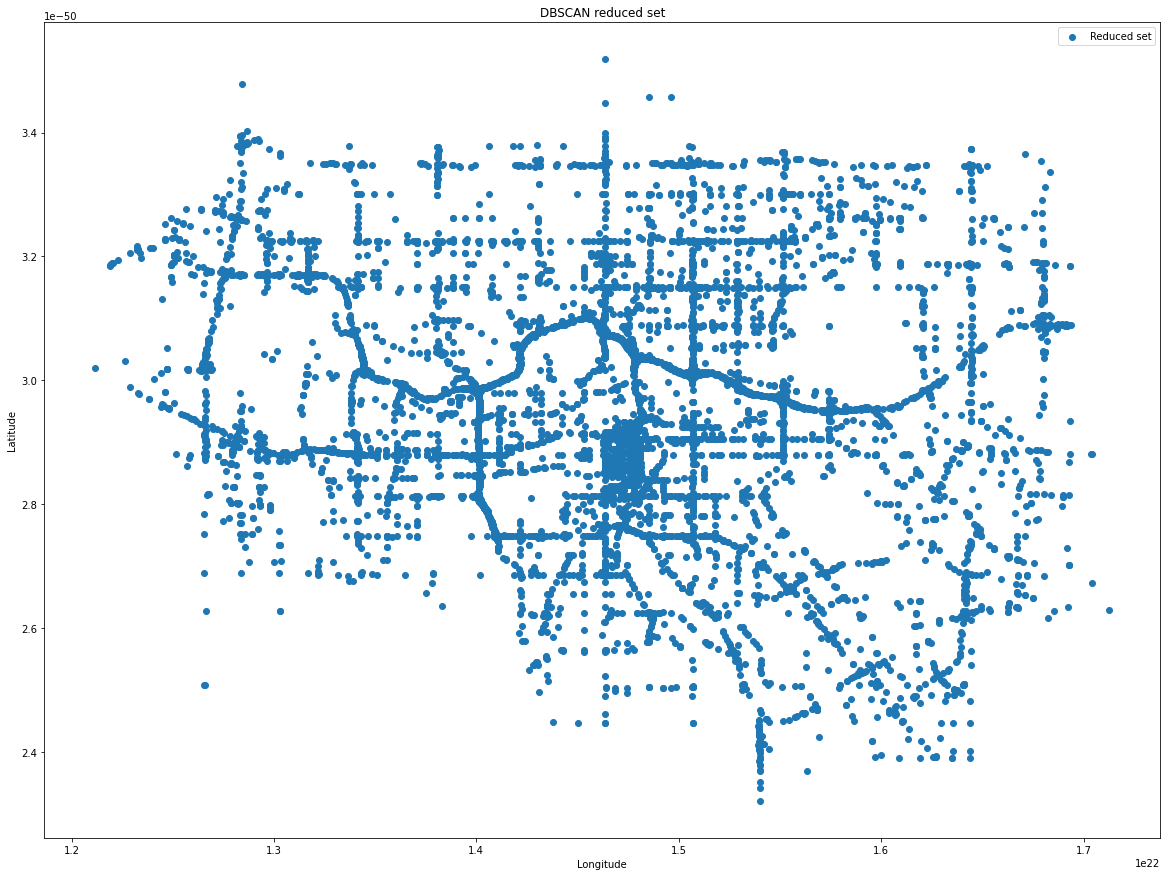

In [61]:
# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[20, 15])
#rs_scatter = ax.scatter(rep_points['Longitude'], rep_points['Latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
#df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)

rs_scatter = ax.scatter(rep_points['Longitude'], rep_points['Latitude'])
#df_scatter = ax.scatter(df['Longitude'], df['Latitude'])


ax.set_title('DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
ax.legend([rs_scatter], ['Reduced set'], loc='upper right')
plt.show()

**STEP 2: Negative sampling**

In [86]:
ohe_fields=['INCIDENT INFO','DESCRIPTION','START_DT','MODIFIED_DT','QUADRANT','Longitude','Latitude','location','Count','id','geohash']

# One-Hot encode a couple of variables
df_ohe = pd.get_dummies(df,columns=ohe_fields)

# Get the one-hot variable names
ohe_feature_names = pd.get_dummies(df[ohe_fields],columns=ohe_fields).columns.tolist()
df_ohe.head()

,Point,INCIDENT INFO_ 10 Avenue and 8 Street SW,INCIDENT INFO_ 11 Avenue and 3 Street SE,INCIDENT INFO_ 11 Street and Aviation Pa NE,INCIDENT INFO_ 11 Street and Aviation Pa NE,INCIDENT INFO_ 114 Avenue and Barlow Trail SE,INCIDENT INFO_ 12 Avenue and 1 Street SW,INCIDENT INFO_ 128 Avenue and Redstone Street NE,INCIDENT INFO_ 14 Street and 24 Avenue NW,INCIDENT INFO_ 14 Street and 8 Avenue NW,...,geohash_c3ng1,geohash_c3ng4,geohash_c3ng5,geohash_c3ngh,geohash_c3ngj,geohash_c3ngn,geohash_c3ngp,geohash_c3p18,geohash_c3p40,geohash_c3p42
0,POINT (-114.0649874 51.09611149),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,POINT (-114.0205479 51.0476343),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,POINT (-114.0581785 51.04447099),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,POINT (-114.0308717 51.02839263),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,POINT (-114.1195835 51.06639113),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**STEP 3: Feature Engineering**

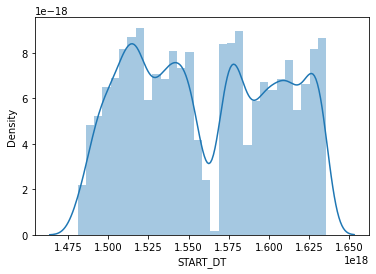

In [93]:
#COMBINE SPATIAL FEATURES AS A SINGLE ATTRIBUTE IN DATA FRAME AS geohash
import pygeohash as gh

#df["geohash"] = df.apply(lambda x: gh.encode(x["Latitude"],x["Longitude"],precision=5), axis = 1)
#df.head()


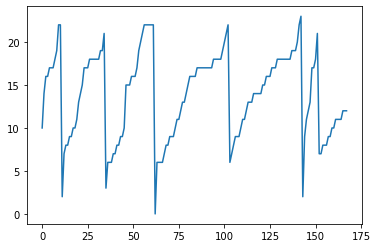

In [133]:
#Encode the time series data as cyclical and interpret the data as an (x,y) coordinate
#import seaborn as sns
#ax = sns.distplot(df.START_DT)

df['hour'] = df.START_DT.dt.hour
sample = df[:168] # roughly the first week of the data
ax = sample['hour'].plot()
#Data is cyclical and moves between 0 and 23 repeating 7 times- We need to change the encoding of the feature such that midnight and 11:00PM are the same distance apart as any other two hours.

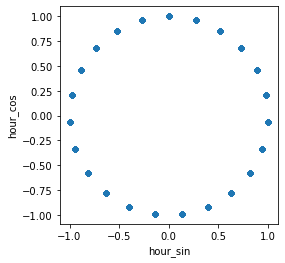

In [139]:
#ENCODE TIME (HOURS)
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/23.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/23.0)

#sample[10:26]

ax = df.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

In [144]:
#ENCODE MONTH
df['month'] = df.START_DT.dt.month
df['month']
df['month'].value_counts()
#data = encode(data, 'month', 12)


10    2921
2     2903
12    2705
9     2512
6     2290
3     2277
11    2272
1     2215
8     2109
7     1993
5     1991
4     1706
Name: month, dtype: int64

In [145]:
#ENCODE DAY
df['day'] = df.START_DT.dt.day
df['day']
df['day'].value_counts()
#data = encode(data, 'day', 365)

8     1037
13    1018
12    1013
16     997
11     987
10     987
23     967
3      963
9      962
2      960
5      959
15     948
17     924
21     920
14     919
7      914
28     904
22     891
20     888
6      883
27     867
29     866
24     865
18     858
4      857
19     835
30     820
26     808
1      791
25     774
31     512
Name: day, dtype: int64

**Step 4: Set Up ML model**

In [146]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)

NameError: name 'data' is not defined

**NOTE: MAY APPLY TYPE FOR CLUSTERING**